# Advanced Regression Assignment

# Business Goal

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Importing Necassary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

Reading the data

In [4]:
df=pd.read_csv("train.csv",encoding = 'utf-8')

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data=df.copy()

In [7]:
data.shape

(1460, 81)

In [8]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
data.drop(['Id'],axis=1,inplace=True)

In [10]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


## Checking for missing values

In [11]:
data.loc[:, data.isna().any()].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### Replace NA with None in the columns below-

In [12]:
na_list=["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature","Electrical"]
for i in na_list:
    data[i].fillna("None", inplace=True)

## Checking for missing values after imputation

In [13]:
data.loc[:, data.isna().any()].isnull().sum().sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

### Treating LotFrontage column and imputing 

In [14]:
data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [15]:
data['LotFrontage']=data['LotFrontage'].replace(np.nan, data['LotFrontage'].median())

### Filling GarageYrBlt,MasVnrArea columns

In [16]:
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data.shape

(1460, 80)

### Derived Column-PropertyAge
#### We have two given columns YrSold and YearBuilt and from those, we can create a new derived column PropertyAge

In [17]:
data['PropertyAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,8


### Exploratory Data Analysis

#### Neighborhood vs SalePrice

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

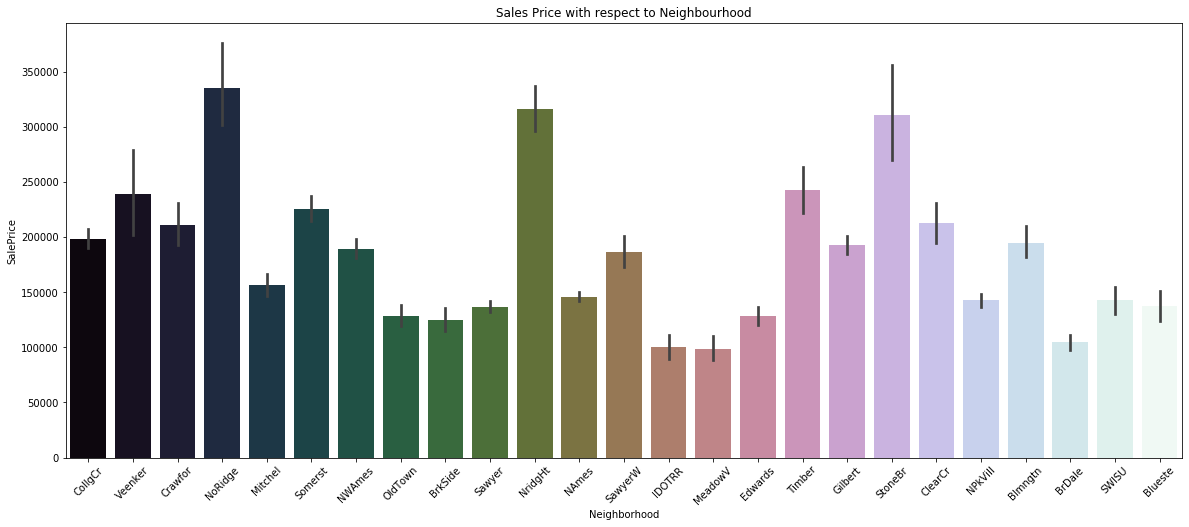

In [18]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data,palette='cubehelix')
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=45)

### OverallQual vs SalePrice

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

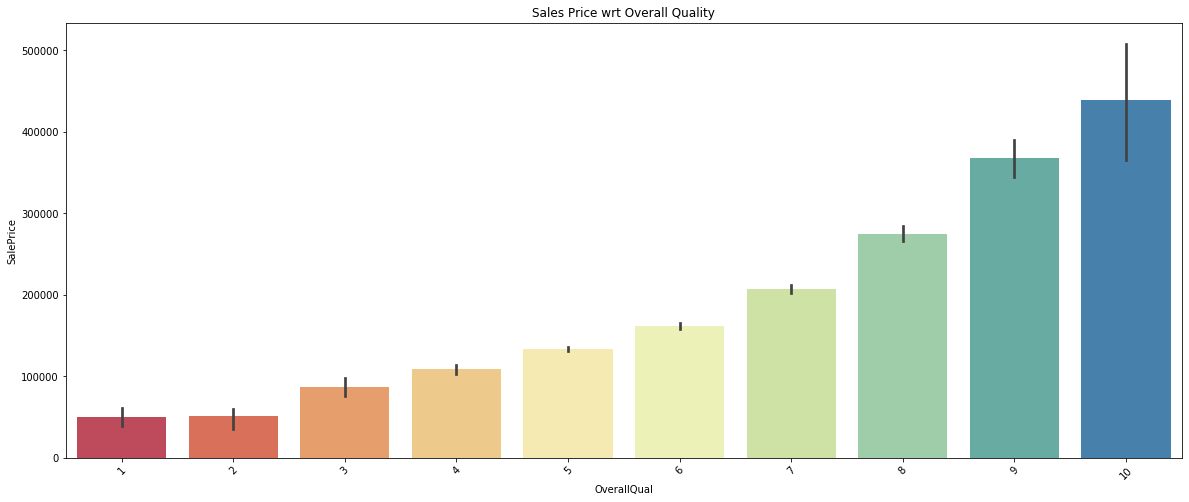

In [19]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data,palette='Spectral')
plt.title("Sales Price wrt Overall Quality")
plt.xticks(rotation=45)

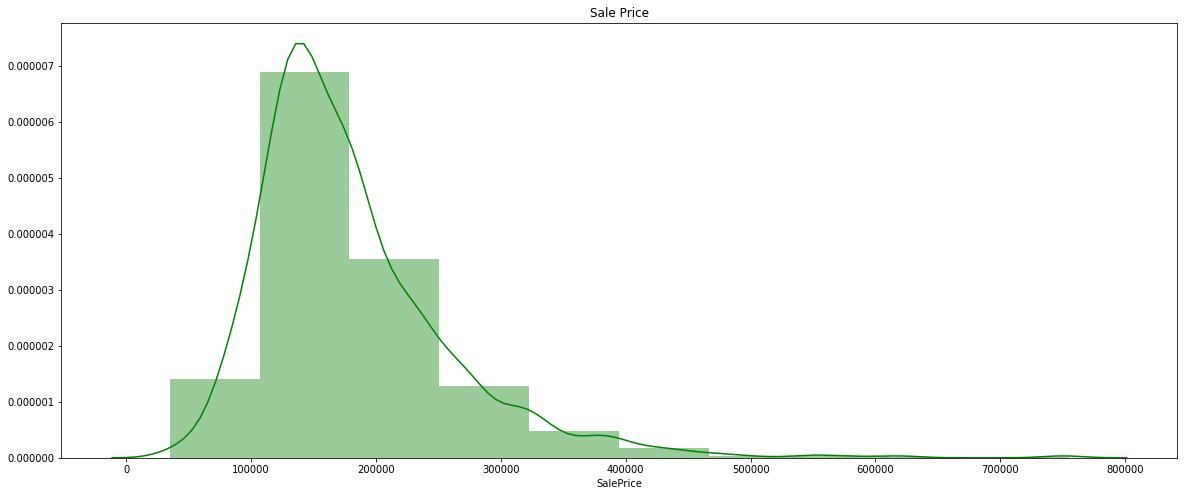

In [20]:
plt.figure(figsize=(20, 8))
plt.title('Sale Price')
sns.distplot(data['SalePrice'], bins=10,color='green')
plt.show()

#### The target variable is right skewed and needs to be transformed in order to be perfectly normally distributed.

In [21]:
data['SalePrice'] = np.log1p(data['SalePrice'])

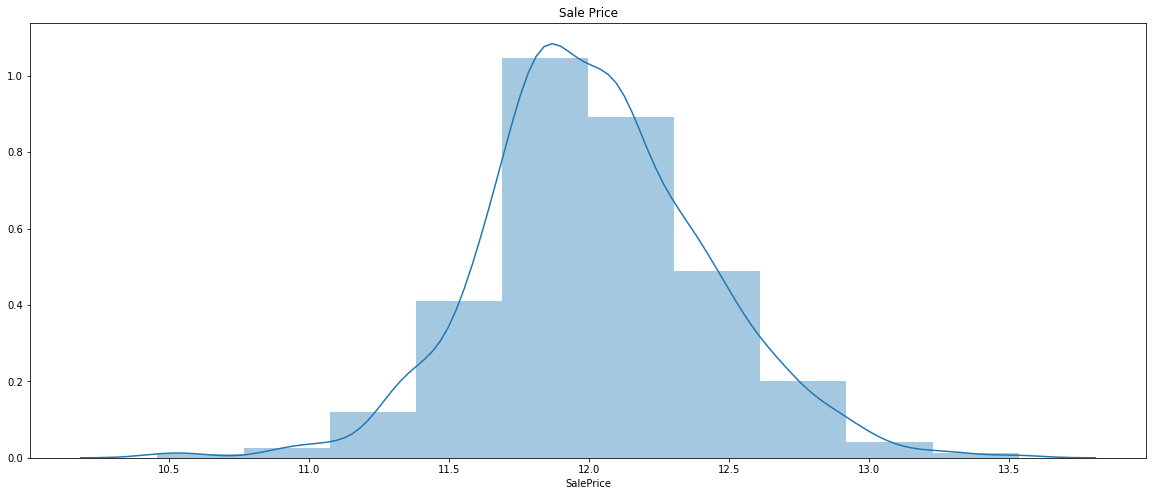

In [22]:
plt.figure(figsize=(20, 8))
plt.title('Sale Price')
sns.distplot(data['SalePrice'], bins=10)
plt.show()

#### Now, we achieved the normal distribution for the target variable with some noise.

#### Mapping the Ordinal Categorical Columns according to their respective levels.

In [23]:
data['LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
data['ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data['BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
data['HeatingQC'] = data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['KitchenQual'] = data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
data['BldgType'] = data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
data['HouseStyle'] = data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })

data['LotConfig'] = data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
data['MasVnrType'] = data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
data['SaleCondition'] = data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
####################################################################################################################
data['LandSlope'] = data['LandSlope'].map({'Gtl': 3, 'Mod': 2, 'Sev': 1})

data['ExterCond'] = data['ExterCond'].map({'Po': 0, 'Fa': 1, 'TA': 2,'Gd':3,'Ex':4})

data['BsmtCond'] = data['BsmtCond'].map({'NA': 0, 'Po': 1, 'Fa': 2,'TA': 3,'Gd':4,'Ex':5})

data['BsmtFinType2'] = data['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})

data['GarageQual'] = data['GarageQual'].map({'NA': 0, 'Po': 1, 'Fa': 2,'TA': 3,'Gd':4,'Ex':5}) 
data.shape

(1460, 81)

#### storing numerical variables in one variable for further EDA

In [24]:
data_num = data.select_dtypes(include=['float64', 'int64'])

### Analyzing Numeric Columns

### GeLivArea vs SalePrice

<Figure size 1440x576 with 0 Axes>

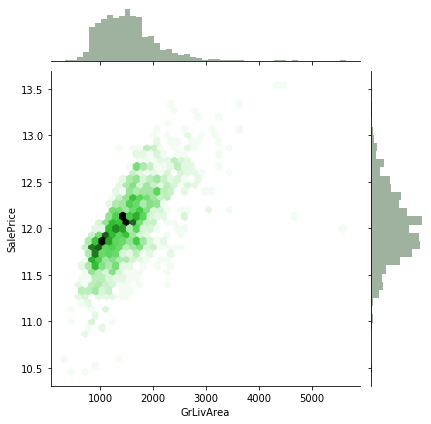

In [25]:
plt.figure(figsize=(20,8))
sns.jointplot(x = data['GrLivArea'], y = data['SalePrice'],kind='hex',color='#103F10')
plt.show()

#### Lot frontage vs SalePrice 

<Figure size 1440x576 with 0 Axes>

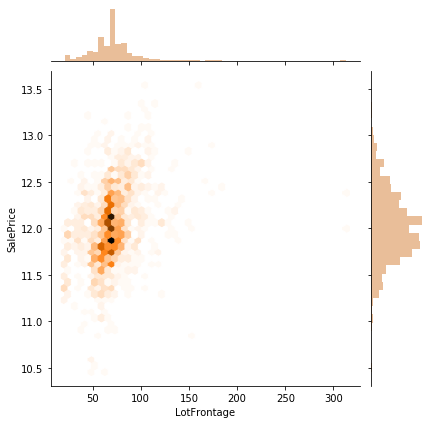

In [26]:
plt.figure(figsize=(20,8))
sns.jointplot(x = data['LotFrontage'], y = data['SalePrice'],kind='hex',color='#C95E00')
plt.show()

#### LotArea vs SalePrice

<Figure size 1440x576 with 0 Axes>

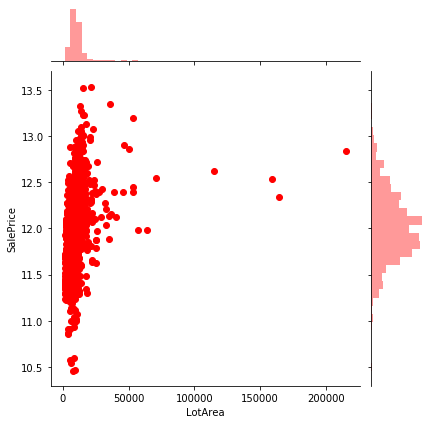

In [27]:
plt.figure(figsize=(20,8))
sns.jointplot(x = data['LotArea'], y = data['SalePrice'],color='Red')
plt.show()

### 2ndFlrSF vs SalePrice

<Figure size 1440x576 with 0 Axes>

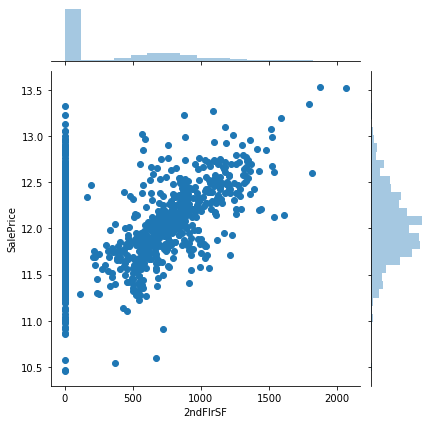

In [28]:
plt.figure(figsize=(20,8))
sns.jointplot(x = data['2ndFlrSF'], y = data['SalePrice'])
plt.show()

### PropertyAge vs SalePrice

<Figure size 1440x576 with 0 Axes>

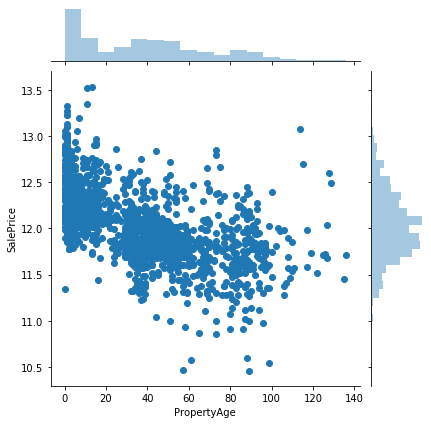

In [29]:
plt.figure(figsize=(20,8))
sns.jointplot(x = data['PropertyAge'], y = data['SalePrice'])
plt.show()

### Correlation

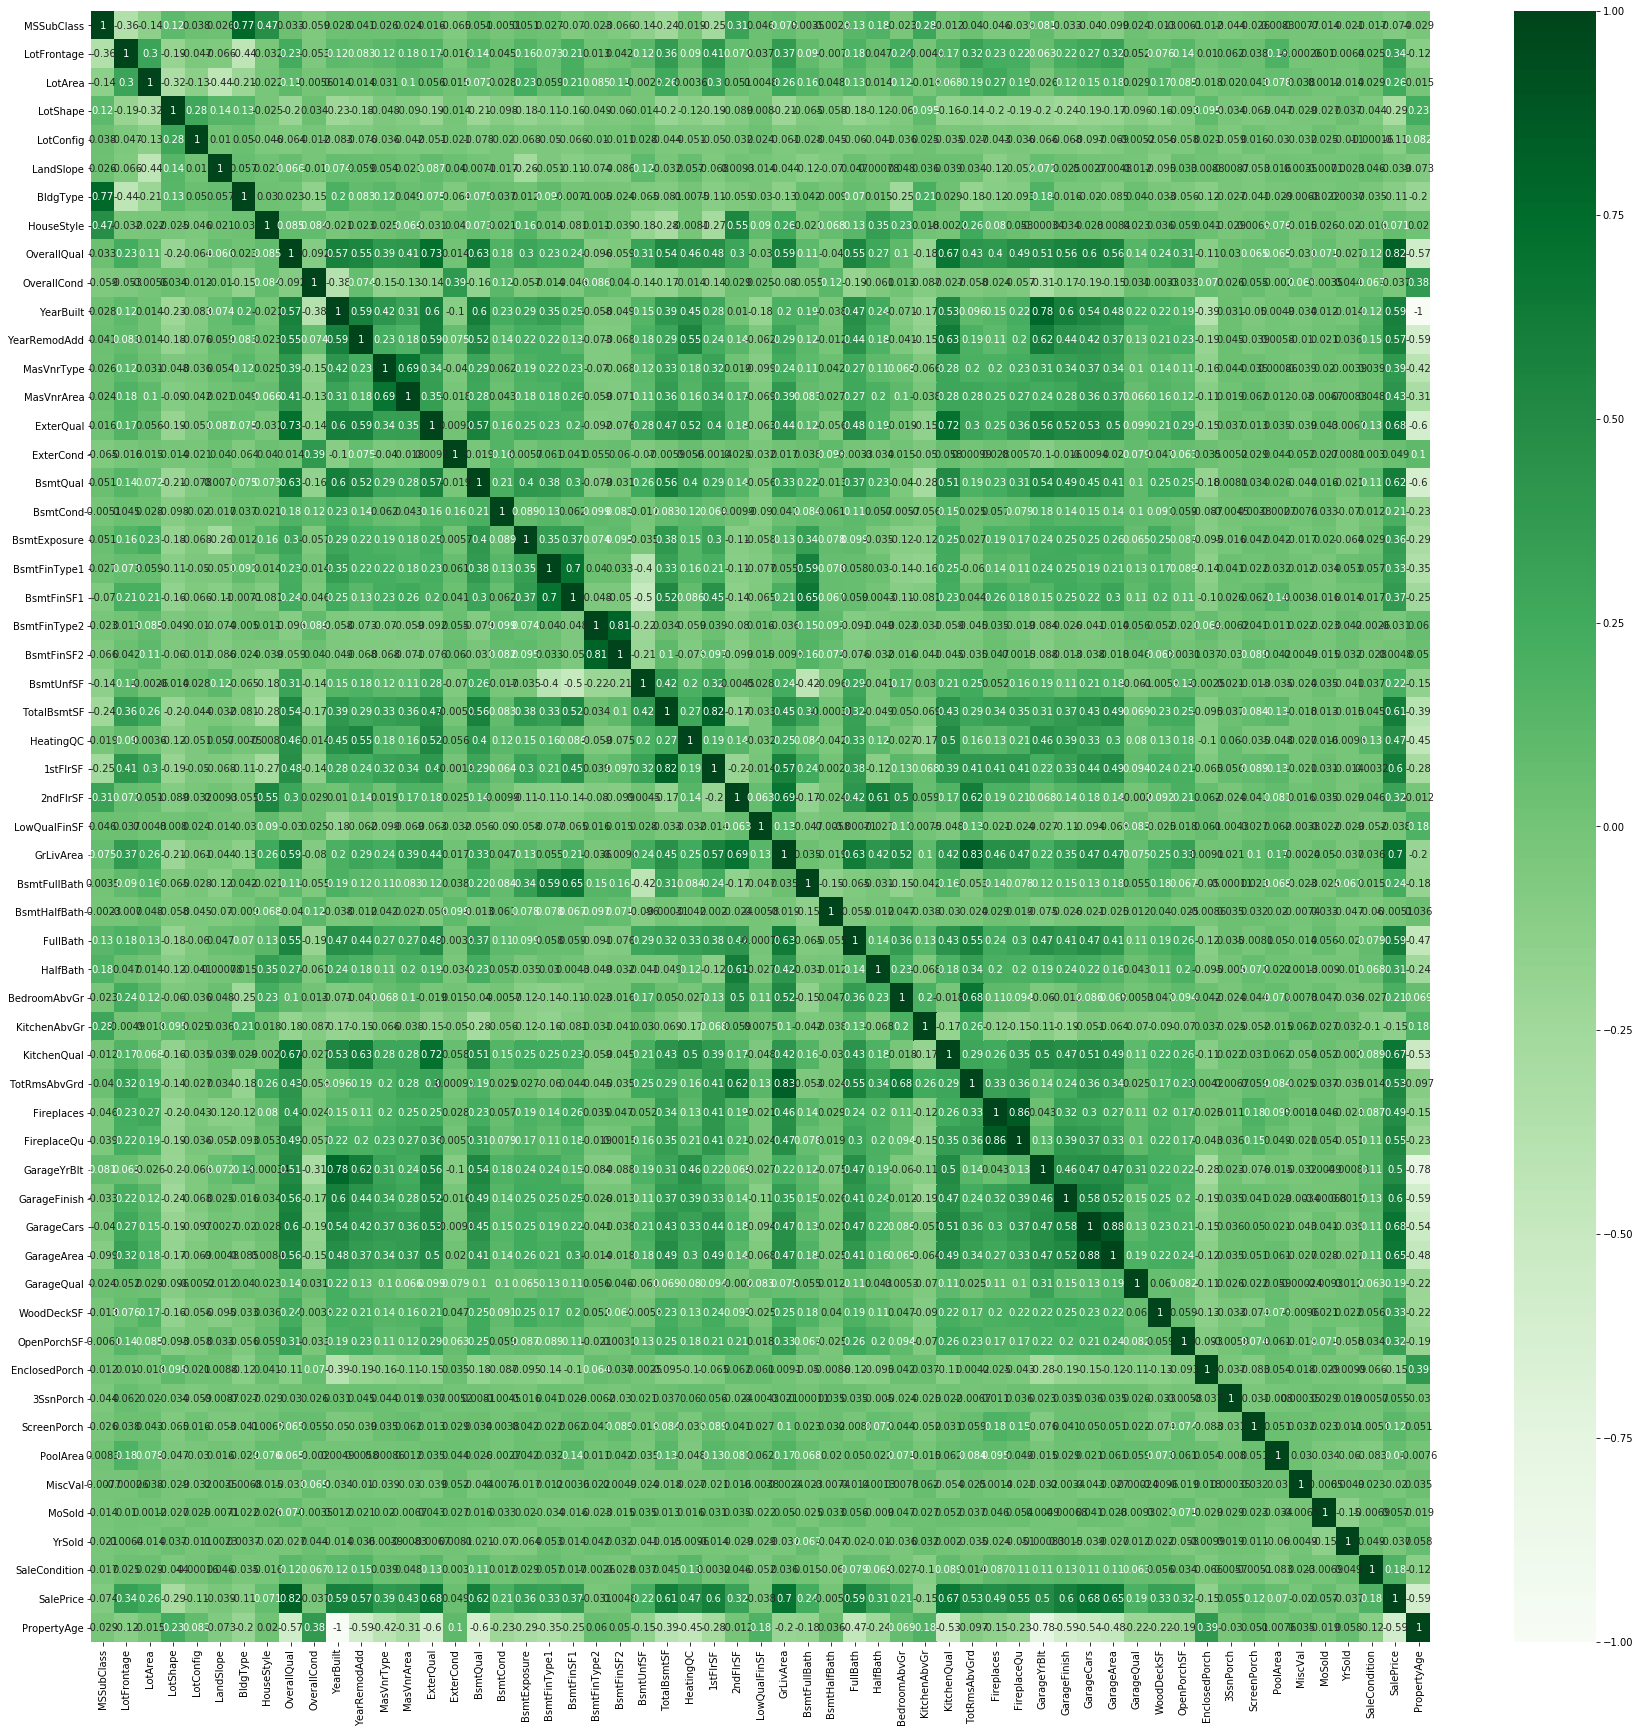

In [30]:
plt.figure(figsize=(30,30))

data_num_corr=data_num.corr(method="pearson")

sns.heatmap(data_num_corr,vmin=-1,vmax=1, annot = True, cmap="Greens")
plt.show()

#### From the above heatmap showing correlations, we can observe that some variables are not helping the target variable and are irrelevant, so we can drop them.

- GarageArea and GarageCars are highly correlated.
- 1stFlrSF and TotalBsmtSF are highly correlated
- TotRmsAbvGrd and GrLivArea are highly correlated
- YearBuilt and GarageYrBlt

In [31]:
data.drop(['1stFlrSF','GarageCars','TotRmsAbvGrd','GarageYrBlt'], axis = 1,inplace=True)  
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Pave,None,3,Lvl,AllPub,5,3,CollgCr,Norm,Norm,1,4,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,1,196.0,4,2,PConc,4,3.0,1,6,706,1.0,0,150,856,GasA,5,Y,SBrkr,854,0,1710,1,0,2,1,3,1,4,Typ,0,0,Attchd,2,548,3.0,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,1,12.247699,5
1,20,RL,80.0,9600,Pave,None,3,Lvl,AllPub,2,3,Veenker,Feedr,Norm,1,1,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0,0.0,3,2,CBlock,4,3.0,4,5,978,1.0,0,284,1262,GasA,5,Y,SBrkr,0,0,1262,0,1,2,0,3,1,3,Typ,1,3,Attchd,2,460,3.0,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,1,12.109016,31
2,60,RL,68.0,11250,Pave,None,2,Lvl,AllPub,5,3,CollgCr,Norm,Norm,1,4,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,1,162.0,4,2,PConc,4,3.0,2,6,486,1.0,0,434,920,GasA,5,Y,SBrkr,866,0,1786,1,0,2,1,3,1,4,Typ,1,3,Attchd,2,608,3.0,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,1,12.317171,7
3,70,RL,60.0,9550,Pave,None,2,Lvl,AllPub,4,3,Crawfor,Norm,Norm,1,4,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0,0.0,3,2,BrkTil,3,4.0,1,5,216,1.0,0,540,756,GasA,4,Y,SBrkr,756,0,1717,1,0,1,0,3,1,4,Typ,1,4,Detchd,1,642,3.0,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,0,11.849405,91
4,60,RL,84.0,14260,Pave,None,2,Lvl,AllPub,2,3,NoRidge,Norm,Norm,1,4,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,1,350.0,4,2,PConc,4,3.0,3,6,655,1.0,0,490,1145,GasA,5,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,4,Typ,1,3,Attchd,2,836,3.0,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,1,12.429220,8


In [32]:
data.shape

(1460, 77)

#### Dropping columns with low correlation with Target variable 

In [33]:
data.drop(['MSSubClass','LotFrontage', 'LotArea', 'LotShape', 'LotConfig','LandSlope', 'BldgType', 'HouseStyle','OverallCond','MasVnrType',
'ExterCond','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinSF1','BsmtFinType2', 'BsmtUnfSF','2ndFlrSF','BsmtFullBath','HalfBath',
'BedroomAbvGr','GarageQual','WoodDeckSF','OpenPorchSF','SaleCondition'], axis = 1,inplace=True)

In [34]:
data.shape

(1460, 52)

#### Dropping columns 'MoSold','YrSold','YearBuilt','YearRemodAdd' as they are irrelevant

In [35]:
data.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd'], axis = 1,inplace=True)

In [36]:
data.shape

(1460, 48)

#### Check and drop columns that show very low variance and thus not required for predictions

In [37]:
def getuniqueValueCounts():
    column = []
    numerical_columns = data.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getuniqueValueCounts()
data.drop(columnsToBeRemoved, axis = 1, inplace = True)
data.shape

(1460, 39)

In [38]:
data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [39]:
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [40]:
data.drop(['Street','Utilities'], axis = 1,inplace=True)

#### Dropping columns due to low variance

In [41]:
data.drop(['PoolQC','Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1,inplace=True)

In [42]:
data.shape

(1460, 29)

#### Creating Dummy Variables

###### Creating dummies for MSZoning

In [43]:
d_MSZoning = pd.get_dummies(data['MSZoning'], prefix='MSZoning', drop_first = True)
data = pd.concat([data, d_MSZoning], axis = 1)

##### Creating dummies for Neighborhood

In [44]:
d_Neighborhood = pd.get_dummies(data['Neighborhood'], prefix='Neighborhood', drop_first = True)
data = pd.concat([data, d_Neighborhood], axis = 1)

##### Creating dummies for RoofStyle

In [45]:
d_RoofStyle = pd.get_dummies(data['RoofStyle'], prefix='RoofStyle', drop_first = True)
data = pd.concat([data, d_RoofStyle], axis = 1)

##### Creating dummies for Exterior1st

In [46]:
d_Exterior1st = pd.get_dummies(data['Exterior1st'], prefix='Exterior1st', drop_first = True)
data = pd.concat([data, d_Exterior1st], axis = 1)

##### Creating dummies for Exterior2nd

In [47]:
d_Exterior2nd = pd.get_dummies(data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
data = pd.concat([data, d_Exterior2nd], axis = 1)

##### Creating dummies for Foundation

In [48]:
d_Foundation = pd.get_dummies(data['Foundation'], prefix='Foundation', drop_first = True)
data = pd.concat([data, d_Foundation], axis = 1)

##### Creating dummies for GarageType

In [49]:
d_GarageType = pd.get_dummies(data['GarageType'], prefix='GarageType', drop_first = True)
data = pd.concat([data, d_GarageType], axis = 1)

In [50]:
data.shape

(1460, 102)

##### Creating dummies for LandContour

In [51]:
d_LandContour = pd.get_dummies(data['LandContour'], prefix='LandContour', drop_first = True)
data = pd.concat([data, d_LandContour], axis = 1)

data.shape

(1460, 105)

##### Creating dummies for Condition1

In [52]:
d_Condition1 = pd.get_dummies(data['Condition1'], prefix='Condition1', drop_first = True)
data = pd.concat([data, d_Condition1], axis = 1)

data.shape

(1460, 113)

##### Creating dummies for CentralAir

In [53]:
d_CentralAir = pd.get_dummies(data['CentralAir'], prefix='CentralAir', drop_first = True)
data = pd.concat([data, d_CentralAir], axis = 1)

data.shape

(1460, 114)

##### Creating dummies for Electrical

In [54]:
d_Electrical = pd.get_dummies(data['Electrical'], prefix='Electrical', drop_first = True)
data = pd.concat([data, d_Electrical], axis = 1)

data.shape

(1460, 119)

##### Creating dummies for PavedDrive

In [55]:
d_PavedDrive = pd.get_dummies(data['PavedDrive'], prefix='PavedDrive', drop_first = True)
data = pd.concat([data, d_PavedDrive], axis = 1)

data.shape

(1460, 121)

##### Creating dummies for MiscFeature

In [56]:
d_MiscFeature = pd.get_dummies(data['MiscFeature'], prefix='MiscFeature', drop_first = True)
data = pd.concat([data, d_MiscFeature], axis = 1)

data.shape

(1460, 125)

##### Creating dummies for SaleType

In [57]:
d_SaleType = pd.get_dummies(data['SaleType'], prefix='SaleType', drop_first = True)
data = pd.concat([data, d_SaleType], axis = 1)

data.shape

(1460, 133)

##### Drop the below columns as we now have new columns derived from these columns

In [58]:
data = data.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
    'GarageType','LandContour','Condition1','CentralAir','Electrical','PavedDrive','MiscFeature','SaleType'], axis=1)

data.head()

,OverallQual,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,...,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,LandContour_HLS,LandContour_Low,LandContour_Lvl,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,7,196.0,4,4,856,5,1710,2,4,0,0,2,548,12.247699,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,6,0.0,3,4,1262,5,1262,2,3,1,3,2,460,12.109016,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,7,162.0,4,4,920,5,1786,2,4,1,3,2,608,12.317171,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,7,0.0,3,3,756,4,1717,1,4,1,4,1,642,11.849405,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,8,350.0,4,4,1145,5,2198,2,4,1,3,2,836,12.429220,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [59]:
data.shape

(1460, 119)

### Train Test Split

In [60]:
X = data.drop(['SalePrice'], axis=1)
X.head()

,OverallQual,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,...,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,LandContour_HLS,LandContour_Low,LandContour_Lvl,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,7,196.0,4,4,856,5,1710,2,4,0,0,2,548,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,6,0.0,3,4,1262,5,1262,2,3,1,3,2,460,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,7,162.0,4,4,920,5,1786,2,4,1,3,2,608,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,7,0.0,3,3,756,4,1717,1,4,1,4,1,642,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,8,350.0,4,4,1145,5,2198,2,4,1,3,2,836,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [61]:
X.shape

(1460, 118)

In [62]:
y = data['SalePrice']
# y.head()

### Scaling

In [63]:
num_vars=[]

for loop in X.columns:
#     print("loop",loop)
    if X[loop].dtype =='float64' or X[loop].dtype == 'int64':
        num_vars.append(loop)

In [64]:
len(num_vars)

14

In [65]:
scaler = MinMaxScaler()

X[num_vars] = scaler.fit_transform(data[num_vars])

### Train-Test Split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=42)

# RFE

In [67]:
# Running RFE with the output number of the variable equal to 75

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 75)            
rfe = rfe.fit(X_train, y_train)

In [68]:
# Assign the columns selected by RFE to cols:-

col = X_train.columns[rfe.support_]

# Assign the 75 features selected using RFE to a dataframe and view them:-

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,OverallQual,True,1
1,BsmtQual,True,1
2,TotalBsmtSF,True,1
3,HeatingQC,True,1
4,GrLivArea,True,1
5,KitchenQual,True,1
6,Fireplaces,True,1
7,GarageFinish,True,1
8,GarageArea,True,1
9,MSZoning_FV,True,1


In [69]:
# Assign the 75 columns to X_train_rfe

X_train_rfe = X_train[col]

In [70]:
# Associate the new 75 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Ridge Regression using GridSearchCV

In [71]:
# list of alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=10]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
9,0.6,-0.094596,-0.103989,1
8,0.5,-0.094441,-0.103999,2
10,0.7,-0.094760,-0.104005,3
7,0.4,-0.094290,-0.104030,4
11,0.8,-0.094936,-0.104038,5
12,0.9,-0.095114,-0.104086,6
6,0.3,-0.094140,-0.104088,7
13,1,-0.095294,-0.104151,8
5,0.2,-0.094002,-0.104188,9
4,0.1,-0.093892,-0.104354,10


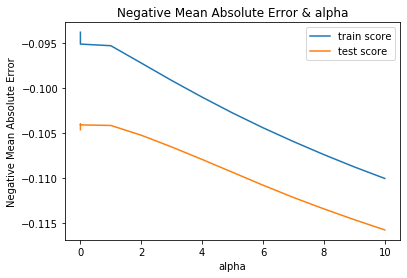

In [73]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error & alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [74]:
# best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=0.6)

In [75]:
# check the coefficient values with lambda = 0.6

alpha = 0.6
ridge = Ridge(alpha=alpha,random_state=100)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.57679085,  0.19799585,  0.1770415 ,  0.06881536,  1.04062728,
        0.14974296,  0.14356753,  0.04676075,  0.31580426,  0.14657427,
        0.18085267,  0.18376434,  0.12205546, -0.11600158, -0.14403026,
        0.03571746,  0.16529381,  0.05777257,  0.15763977,  0.02767925,
       -0.17311647,  0.03468213,  0.03595264,  0.16829565,  0.14523213,
        0.06456872,  0.02359247,  0.03550279,  0.08666041,  0.16257717,
        0.0982527 ,  0.19190565, -0.27572687, -0.05351889, -0.0677494 ,
       -0.0579121 , -0.08594999, -0.09056828, -0.09254582, -0.08827024,
       -0.05351889,  0.05290731,  0.10108166,  0.04899077,  0.07811872,
        0.08058711,  0.04750105,  0.04404248,  0.06916054,  0.08688744,
        0.12521645,  0.08155942,  0.10322411,  0.0030408 ,  0.08997395,
        0.06013352,  0.14625474,  0.12779792,  0.08457028,  0.06345302,
        0.08069768,  0.08082679,  0.04808337,  0.13650875,  0.11887132,
        0.        , -0.06648303, -0.05528975,  0.12641831,  0.12

In [76]:
# Check the mean squared error
y_pred_ridge=ridge.predict(X_test)
mean_squared_error(y_test,y_pred_ridge )

0.02165899490500333

In [77]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,OverallQual,0.5768
1,BsmtQual,0.1980
2,TotalBsmtSF,0.1770
3,HeatingQC,0.0688
4,GrLivArea,1.0406
5,KitchenQual,0.1497
6,Fireplaces,0.1436
7,GarageFinish,0.0468
8,GarageArea,0.3158
9,MSZoning_FV,0.1466


In [78]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'OverallQual': 0.5768,
 'BsmtQual': 0.198,
 'TotalBsmtSF': 0.177,
 'HeatingQC': 0.0688,
 'GrLivArea': 1.0406,
 'KitchenQual': 0.1497,
 'Fireplaces': 0.1436,
 'GarageFinish': 0.0468,
 'GarageArea': 0.3158,
 'MSZoning_FV': 0.1466,
 'MSZoning_RH': 0.1809,
 'MSZoning_RL': 0.1838,
 'MSZoning_RM': 0.1221,
 'Neighborhood_Blueste': -0.116,
 'Neighborhood_BrDale': -0.144,
 'Neighborhood_BrkSide': 0.0357,
 'Neighborhood_ClearCr': 0.1653,
 'Neighborhood_CollgCr': 0.0578,
 'Neighborhood_Crawfor': 0.1576,
 'Neighborhood_Gilbert': 0.0277,
 'Neighborhood_MeadowV': -0.1731,
 'Neighborhood_Mitchel': 0.0347,
 'Neighborhood_NWAmes': 0.036,
 'Neighborhood_NoRidge': 0.1683,
 'Neighborhood_NridgHt': 0.1452,
 'Neighborhood_SWISU': 0.0646,
 'Neighborhood_Sawyer': 0.0236,
 'Neighborhood_SawyerW': 0.0355,
 'Neighborhood_Somerst': 0.0867,
 'Neighborhood_StoneBr': 0.1626,
 'Neighborhood_Timber': 0.0983,
 'Neighborhood_Veenker': 0.1919,
 'Exterior1st_BrkComm': -0.2757,
 'Exterior1st_CBlock': -0.0535,
 'Exterior1s

##### Get the coefficient values

In [79]:
def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
2,GrLivArea,True,1,1.0406
0,OverallQual,True,1,0.5768
5,GarageArea,True,1,0.3158
22,Neighborhood_Veenker,True,1,0.1919
7,MSZoning_RL,True,1,0.1838
18,Neighborhood_NoRidge,True,1,0.1683
11,Neighborhood_ClearCr,True,1,0.1653
13,Neighborhood_Crawfor,True,1,0.1576
44,SaleType_Oth,True,1,0.1521
3,KitchenQual,True,1,0.1497


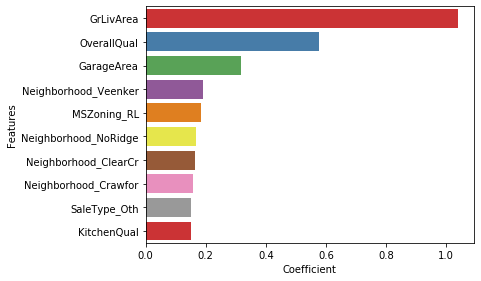

In [80]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

In [81]:
r2_score(y_test, y_pred_ridge)

0.8839350508307825

# Lasso Regression

In [82]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=10]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.094660,-0.104422,1
1,0.001,-0.101449,-0.106511,2
2,0.01,-0.138952,-0.141740,3
3,0.05,-0.250550,-0.251080,4
4,0.1,-0.301899,-0.302471,5
20,8,-0.303326,-0.303775,6
19,7,-0.303326,-0.303775,6
18,6,-0.303326,-0.303775,6
17,5,-0.303326,-0.303775,6
16,4,-0.303326,-0.303775,6


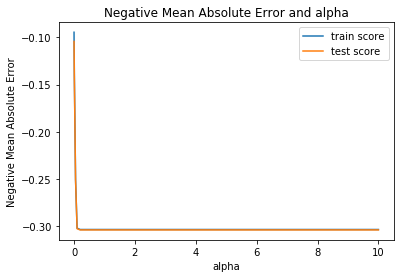

In [84]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [85]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [86]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha,random_state=100)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 5.95783866e-01,  2.00789148e-01,  1.26500688e-01,  6.83849143e-02,
        1.14022809e+00,  1.41569767e-01,  1.33504313e-01,  4.46075422e-02,
        2.95158683e-01,  1.26117648e-01,  1.58945308e-01,  1.68537780e-01,
        9.98772025e-02, -6.39256252e-02, -1.46416023e-01,  3.51628470e-02,
        1.55775671e-01,  5.02038522e-02,  1.47839164e-01,  1.65861065e-02,
       -1.64003610e-01,  2.69991645e-02,  2.56495478e-02,  1.48354990e-01,
        1.36564857e-01,  4.50664805e-02,  2.05146264e-02,  2.68264257e-02,
        8.32380447e-02,  1.56566763e-01,  8.74200697e-02,  1.90711904e-01,
       -3.01593610e-01, -1.14797006e-05, -5.24079832e-02, -4.69134189e-02,
       -8.59049636e-02, -6.63441103e-02, -8.63367183e-02, -7.68558574e-02,
       -2.65634987e-02,  4.15807303e-02,  2.45022378e-02,  4.00257460e-02,
        5.81796252e-02,  7.42238005e-02,  4.51732825e-02,  4.36734622e-02,
        5.83608522e-02,  6.09008395e-02,  8.32747517e-02,  3.03332698e-02,
        5.08270729e-02, -

In [87]:
# Check the mean squared error
y_pred_lasso=lasso.predict(X_test)
mean_squared_error(y_test,y_pred_lasso )

0.021508326363672562

In [88]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,OverallQual,0.5958
1,BsmtQual,0.2008
2,TotalBsmtSF,0.1265
3,HeatingQC,0.0684
4,GrLivArea,1.1402
5,KitchenQual,0.1416
6,Fireplaces,0.1335
7,GarageFinish,0.0446
8,GarageArea,0.2952
9,MSZoning_FV,0.1261


In [89]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'OverallQual': 0.5957838663450072,
 'BsmtQual': 0.20078914798709954,
 'TotalBsmtSF': 0.12650068844306575,
 'HeatingQC': 0.06838491432491708,
 'GrLivArea': 1.1402280945863723,
 'KitchenQual': 0.14156976706337462,
 'Fireplaces': 0.13350431291412862,
 'GarageFinish': 0.04460754218079105,
 'GarageArea': 0.2951586831242014,
 'MSZoning_FV': 0.12611764759545915,
 'MSZoning_RH': 0.15894530838611312,
 'MSZoning_RL': 0.1685377803105681,
 'MSZoning_RM': 0.09987720247965616,
 'Neighborhood_Blueste': -0.06392562518106226,
 'Neighborhood_BrDale': -0.14641602334286458,
 'Neighborhood_BrkSide': 0.03516284696283642,
 'Neighborhood_ClearCr': 0.15577567086985178,
 'Neighborhood_CollgCr': 0.05020385223270001,
 'Neighborhood_Crawfor': 0.1478391639211777,
 'Neighborhood_Gilbert': 0.016586106459342484,
 'Neighborhood_MeadowV': -0.1640036102967683,
 'Neighborhood_Mitchel': 0.026999164479901548,
 'Neighborhood_NWAmes': 0.025649547793153333,
 'Neighborhood_NoRidge': 0.14835499017878875,
 'Neighborhood_NridgHt'

In [90]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
2,GrLivArea,True,1,1.140228
0,OverallQual,True,1,0.595784
5,GarageArea,True,1,0.295159
22,Neighborhood_Veenker,True,1,0.190712
7,MSZoning_RL,True,1,0.168538
11,Neighborhood_ClearCr,True,1,0.155776
18,Neighborhood_NoRidge,True,1,0.148355
13,Neighborhood_Crawfor,True,1,0.147839
3,KitchenQual,True,1,0.141570
4,Fireplaces,True,1,0.133504


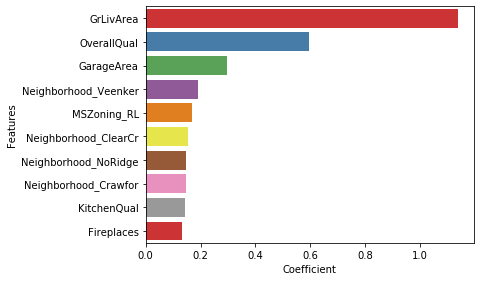

In [91]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

In [92]:
r2_score(y_test, y_pred_lasso)

0.8847424445564681

# Conclusion :
##### The optimal lambda value in case of Ridge and Lasso is as below:

-Ridge - 0.6

-Lasso - 0.0001

##### The Mean Squared error in case of Ridge and Lasso are:

-Ridge - 0.0216

-Lasso - 0.0215

##### The R2 Score in case of Ridge and Lasso are:

-Ridge - 0.8839

-Lasso - 0.8847


#### The  R2 Score of Lasso has improved value as compared to Ridge